# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
record=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]


for city in cities:
    response = requests.get(f"{url}&q={city}")
    try:
        response.raise_for_status()
        response_json=response.json()
        #print(response_json)
        city_name.append(response_json["name"])
        #city_record=response_json["name"]
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        max_temp.append(response_json["main"]["temp_max"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        print(f"Processing Record {record} | {response_json['name']}")
        record=record+1
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping")
    #continue
    

Processing Record 1 | Fujieda
City not found. Skipping
Processing Record 2 | Bundaberg
Processing Record 3 | Rikitea
Processing Record 4 | Carutapera
Processing Record 5 | Zeya
Processing Record 6 | New Norfolk
Processing Record 7 | Te Anau
Processing Record 8 | Bambous Virieux
Processing Record 9 | Pevek
Processing Record 10 | Bluff
Processing Record 11 | Atuona
Processing Record 12 | Dolzhanskaya
Processing Record 13 | Comodoro Rivadavia
Processing Record 14 | Taozhuang
Processing Record 15 | Santa Maria
City not found. Skipping
Processing Record 16 | Cape Town
Processing Record 17 | Talnakh
Processing Record 18 | Tasiilaq
Processing Record 19 | Fortuna
Processing Record 20 | Airai
Processing Record 21 | Providencia
Processing Record 22 | Nome
Processing Record 23 | Yellowknife
Processing Record 24 | Punta Arenas
Processing Record 25 | Kapaa
Processing Record 26 | Loandjili
Processing Record 27 | Srivardhan
Processing Record 28 | Coahuayana
Processing Record 29 | Urcos
Processing Rec

Processing Record 229 | Kota Kinabalu
Processing Record 230 | Saint-Georges
Processing Record 231 | Cidreira
Processing Record 232 | Makakilo City
Processing Record 233 | Fukue
Processing Record 234 | Piacabucu
Processing Record 235 | Numan
Processing Record 236 | Namibe
City not found. Skipping
Processing Record 237 | Xining
City not found. Skipping
Processing Record 238 | Kayanza
Processing Record 239 | Masalli
Processing Record 240 | Oistins
Processing Record 241 | Victor Harbor
Processing Record 242 | Motril
City not found. Skipping
Processing Record 243 | Puerto Suarez
Processing Record 244 | Oranjemund
Processing Record 245 | Mao
Processing Record 246 | Atar
Processing Record 247 | Libenge
Processing Record 248 | Half Moon Bay
Processing Record 249 | Miyako
Processing Record 250 | Adre
Processing Record 251 | Fengcheng
Processing Record 252 | Samarai
Processing Record 253 | Umm Lajj
Processing Record 254 | Rakamaz
Processing Record 255 | Puerto Palomas
Processing Record 256 | San

Processing Record 459 | Gornopravdinsk
Processing Record 460 | Wajid
Processing Record 461 | Fereydun Kenar
Processing Record 462 | Kinchil
Processing Record 463 | Quatre Cocos
Processing Record 464 | Ponta do Sol
Processing Record 465 | Khalkhal
Processing Record 466 | Flagstaff
City not found. Skipping
Processing Record 467 | Poum
Processing Record 468 | Hay River
Processing Record 469 | Mount Gambier
Processing Record 470 | Kaeo
Processing Record 471 | Swanton
Processing Record 472 | Rena
Processing Record 473 | Buta
Processing Record 474 | Faya
Processing Record 475 | Talcahuano
Processing Record 476 | Saint-Paul-les-Dax
Processing Record 477 | Mana
Processing Record 478 | Wajima
City not found. Skipping
Processing Record 479 | Port Antonio
Processing Record 480 | Zdvinsk
City not found. Skipping
Processing Record 481 | Yantal
City not found. Skipping
Processing Record 482 | Iqaluit
Processing Record 483 | Yinchuan
Processing Record 484 | Merrill
Processing Record 485 | Suntar
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_dict={"City":city_name,
               "Cloudiness":cloudiness,
                "Country":country,
                 "Date":date,
                  "Humidity":humidity,
                   "Lat":lat,
                    "Lng":lng,
                     "Max Temp":max_temp,
                      "Wind Speed":wind_speed}
weather_data=pd.DataFrame(weather_dict)
city_count=weather_data["City"].count()
#print(city_count)
cloudiness_count=weather_data["Cloudiness"].count()
#print(cloudiness_count)   
country_count=weather_data["Country"].count()
date_count=weather_data["Date"].count()
humidity_count=weather_data["Humidity"].count()
lat_count=weather_data["Lat"].count()
lng_count=weather_data["Lng"].count()
maxTemp_count=weather_data["Max Temp"].count()
windSpeed_count=weather_data["Wind Speed"].count()
total_count={"City":[city_count],
              "Cloudiness":[cloudiness_count],
              "Country":[country_count],
              "Date":[date_count],
              "Humidity":[humidity_count],
              "Lat":[lat_count],
              "Lng":[lng_count],
              "Max Temp":[maxTemp_count],
              "Wind Speed":[windSpeed_count]}
total_count_pd=pd.DataFrame(total_count)
total_count_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,547,547,547,547,547,547,547,547,547


In [5]:
weather_data.to_csv("output_data_file")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fujieda,75,JP,1561509860,61,34.93,138.23,298.150,1.50
1,Bundaberg,75,AU,1561509844,100,-24.87,152.35,292.040,5.70
2,Rikitea,3,PF,1561509861,82,-23.12,-134.97,295.929,3.73
3,Carutapera,42,BR,1561509861,88,-1.20,-46.02,298.129,2.60
4,Zeya,35,RU,1561509861,82,53.74,127.27,285.029,2.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

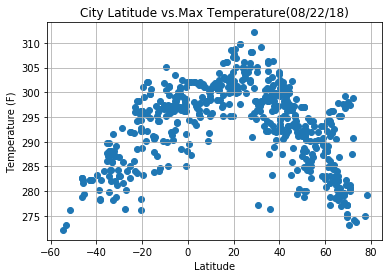

In [6]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude vs.Max Temperature(08/22/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Humidity Plot

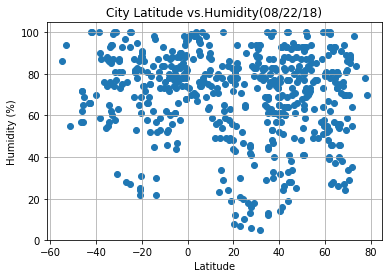

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude vs.Humidity(08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

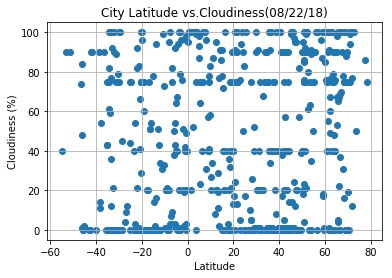

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude vs.Cloudiness(08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

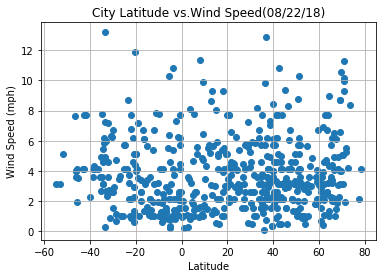

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude vs.Wind Speed(08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)